In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Extracting Features

In [55]:
path="Data/"
features = list()
with open(path+"Features.txt") as f:
    for line in f:
        features.append(line.split()[1])
print(len(features))


561


## Reading train data

In [56]:
train_df = pd.read_csv(path+"train/X_train.txt", delim_whitespace = True)
train_df.columns = features
# print(train_df)

train_df["subject_id"] = pd.read_csv(path+"train/subject_train.txt", header = None, squeeze = True) #squeeze = True will 
# #return data in pandas series format

train_df["activity"] = pd.read_csv(path+"train/y_train.txt", header = None, squeeze = True)

activity = pd.read_csv(path+"train/y_train.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

train_df["activity_name"] = label_name

train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING


In [57]:
print("Size of Train data = {}".format(train_df.shape))

Size of Train data = (7351, 564)


## Reading test Data

In [59]:
test_df = pd.read_csv(path+"test/X_test.txt", delim_whitespace = True)
test_df.columns = features

test_df["subject_id"] = pd.read_csv(path+"test/subject_test.txt", header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

test_df["activity"] = pd.read_csv(path+"/test/y_test.txt", header = None, squeeze = True)

activity = pd.read_csv(path+"test/y_test.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

test_df["activity_name"] = label_name

test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,5,STANDING


In [60]:
# Checking for nan values
print("Number of NaN values in train data is "+str(train_df.isnull().sum().sum()))
print("Number of NaN values in test data is "+str(test_df.isnull().sum().sum()))

Number of NaN values in train data is 0
Number of NaN values in test data is 0


In [61]:
# Checking for duplicate values
print("Number of duplicate values in train data is "+str(sum(train_df.duplicated())))
print("Number of duplicate values in test data is "+str(sum(test_df.duplicated())))

Number of duplicate values in train data is 0
Number of duplicate values in test data is 0


## Changing Feature Name

In [62]:
columns = train_df.columns
columns = columns.str.replace("[()]", '') 
columns = columns.str.replace("-", '')
columns = columns.str.replace(",", '')

#here, columns is of type pandas index. By writing "columns.str" we have changed its type to 
#pandas string. Pandas string has method called replace which we have used here.

train_df.columns = columns
test_df.columns = columns

In [63]:
train_df.columns
features_clean=train_df.columns

print(type(features_clean))

<class 'pandas.core.indexes.base.Index'>


In [64]:
train_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity,activity_name
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING


In [65]:

x = train_df.loc[:,features_clean[:-3]] 
print(x)
y = train_df.loc[:,['activity_name']].values
print(y)

x = StandardScaler().fit_transform(x)


# print(x)

      tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
1          0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
2          0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
3          0.276629      -0.016570      -0.115362     -0.998139     -0.980817   
4          0.277199      -0.010098      -0.105137     -0.997335     -0.990487   
...             ...            ...            ...           ...           ...   
7346       0.299665      -0.057193      -0.181233     -0.195387      0.039905   
7347       0.273853      -0.007749      -0.147468     -0.235309      0.004816   
7348       0.273387      -0.017011      -0.045022     -0.218218     -0.103822   
7349       0.289654      -0.018843      -0.158281     -0.219139     -0.111412   
7350       0.351503      -0.012423      -0.203867     -0.269270     -0.087212   

      tBodyAccstdZ  tBodyAc

In [66]:
# train_df.DataFrame(data = x, columns = features_clean).head()
pca = PCA(n_components=50)
print(pca)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [78]:
principalComponents = pca.fit_transform(x)
pca2 = PCA(n_components=2, whiten=True)
pca2.fit(x)
X_r = pca2.transform(x)

In [79]:
# columns = ['principal component 1', 'principal component 2']
columns=[]
for i in range(0,50):
#     name=
#     print(name)
    columns.append("principal component "+str(i))
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)
principalDf.head(5)

,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,...,principal component 40,principal component 41,principal component 42,principal component 43,principal component 44,principal component 45,principal component 46,principal component 47,principal component 48,principal component 49
0,-17.429429,2.711334,0.400584,-0.258350,-0.396804,0.070788,4.137868,3.121625,-0.309311,-2.064086,...,-0.089557,1.940869,-1.089772,-0.730249,-0.704520,-0.768173,1.685027,0.606676,-0.618295,0.431171
1,-17.284080,3.457653,0.147108,-1.576343,0.168774,-0.228070,4.804149,2.756822,0.012999,-1.989704,...,0.661091,1.636089,0.150887,-0.186172,-0.034478,-1.131184,1.030211,0.044242,0.393280,-1.259688
2,-17.429090,4.622968,-0.435865,-1.869826,-0.000228,-0.043756,3.580721,1.590677,0.382016,-2.396405,...,1.182360,0.200979,-0.606821,0.926820,0.125616,-0.708301,-0.031687,-1.016725,-0.877623,-2.252891
3,-17.564087,5.213861,-0.595303,-2.237518,-0.448347,0.173321,4.057368,2.011503,-0.318243,-1.137364,...,-0.049783,0.897261,0.119159,1.219438,0.268265,-0.221439,0.259914,-1.288083,1.005031,-0.113212
4,-17.414748,5.222168,-0.778126,-2.357199,-0.494190,0.165639,3.821247,1.153988,-0.525807,-0.183296,...,-1.420432,0.943049,-0.450744,1.573917,-0.079112,-0.464909,-0.865350,-1.050959,0.879939,0.679782


In [80]:
print("Size of Test data = {}".format(principalDf.shape))

Size of Test data = (7351, 50)


In [81]:
# finalDf = train_df.concat([principalDf, train_df[['activity_name']]], axis = 1)
principalDf["activity_name"]=train_df.loc[:,["activity_name"]]
# finalDf.head(5)
# print(principalDf)

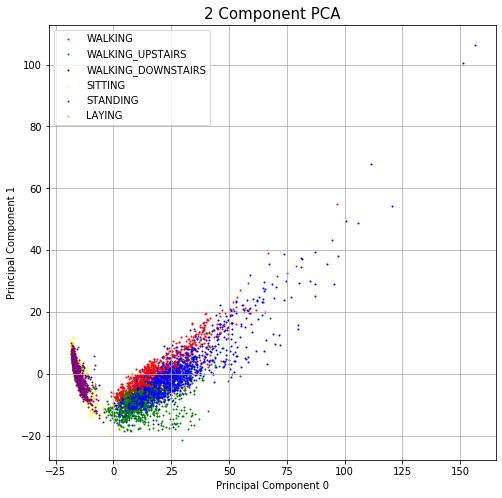

In [82]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 0', fontsize = 10)
ax.set_ylabel('Principal Component 1', fontsize = 10)
ax.set_title('2 Component PCA', fontsize = 15)


targets = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',"SITTING","STANDING","LAYING"]
colors = ['r', 'g', 'b', 'yellow', 'purple','orange']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['activity_name'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 0']
               , principalDf.loc[indicesToKeep, 'principal component 1']
               , c = color
               , s = 1)
ax.legend(targets)
ax.grid()

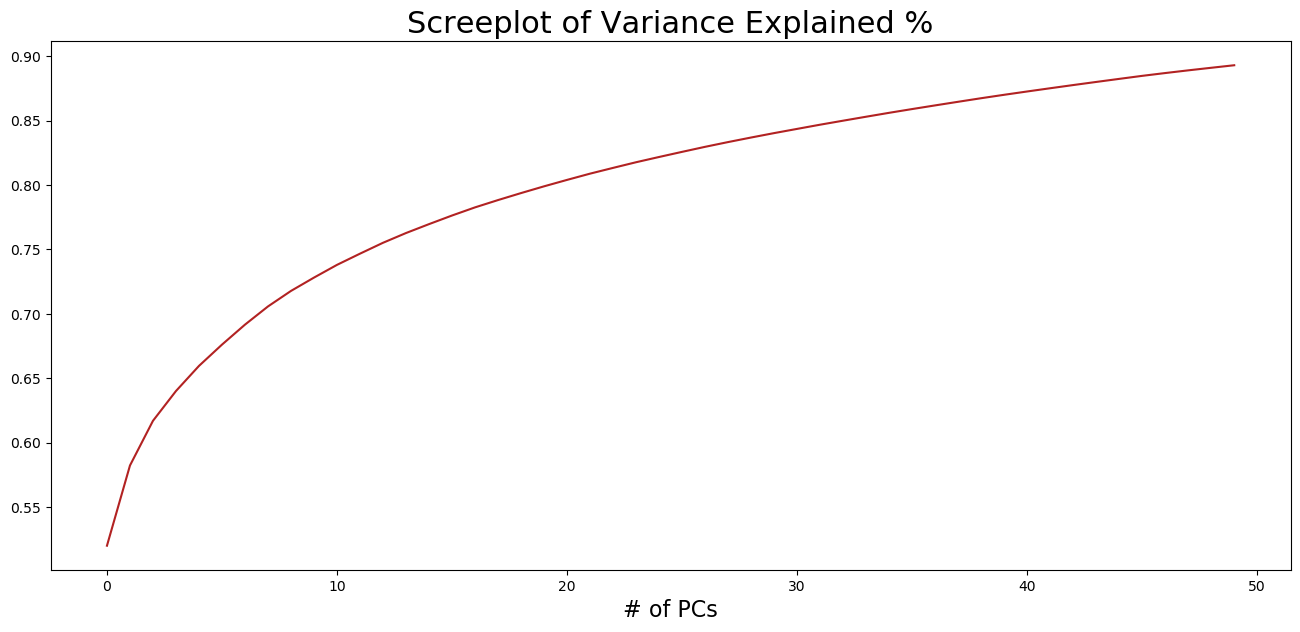

In [83]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum()
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [85]:
from sklearn.svm import SVC
# Make SVC
linclass2 = SVC()
linclass2.fit(X_r,y)

C:\Users\hu021\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
X_red_validation = pca2.transform(x)
yhat_validation = linclass2.predict(X_red_validation)

y_validation = y

In [98]:
import seaborn as sns

from sklearn.metrics import confusion_matrix

def plot_cm(y_validation, yhat_validation, class_names=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',"SITTING","STANDING","LAYING"]):
  cm = confusion_matrix(y_validation,yhat_validation)
  fig, ax = plt.subplots(figsize=(21, 19)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap='inferno',
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_title('Confusion Matrix')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names, rotation=0)
  b, t = plt.ylim() 
  b += 0.5 
  t -= 0.5 
  plt.ylim(b, t) 
  plt.show() 


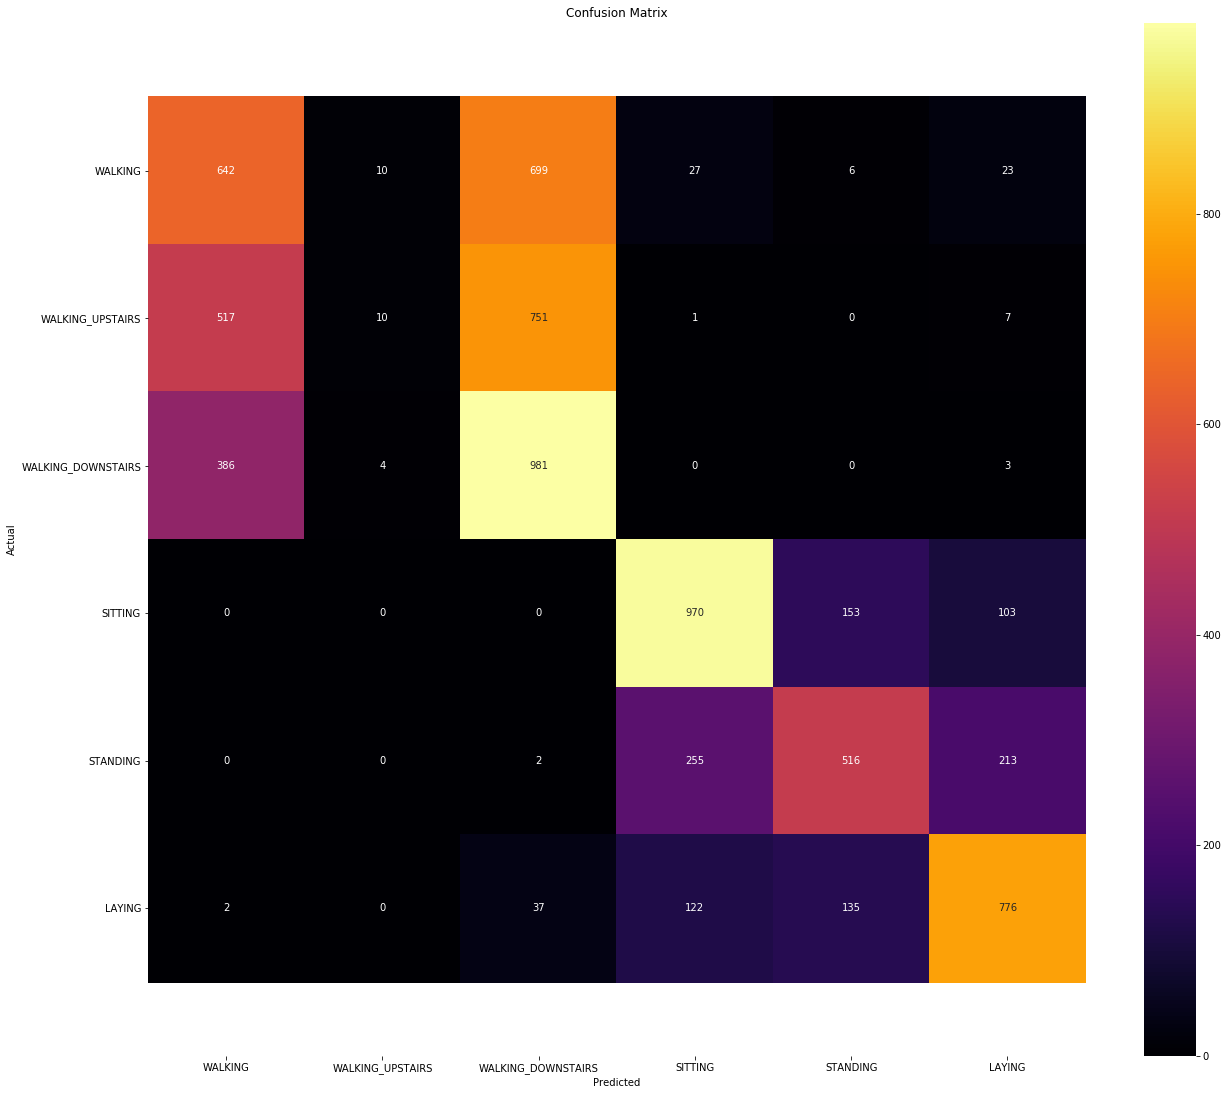

In [99]:
plot_cm(y_validation, yhat_validation,
)